## 1. Анализ данных

### 1.1 Импорты

In [19]:
# imports
import os

import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

# import sklearn #collection of machine learning algorithms
# print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time
import datetime
import holidays
import re
import gc
from math import ceil

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output

Python version: 3.7.5 (default, Nov 20 2019, 09:21:52) 
[GCC 9.2.1 20191008]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.18.2
SciPy version: 1.4.1


In [1]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBRegressor

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [21]:
# Create calendar
ru_holidays = holidays.Russia()

dt_min = datetime.date(2013,1,1)
dt_max = datetime.date(2016,1,1)

cal_df = pd.DataFrame()
cal_df["date"] = pd.date_range(dt_min, dt_max)
cal_df["year"] = cal_df["date"].apply(lambda x: x.year)
cal_df["month"] = cal_df["date"].apply(lambda x: x.month)
cal_df["weekday"] = cal_df["date"].apply(datetime.datetime.weekday)
cal_df["weekend"] = cal_df["weekday"].apply(lambda x: int(x in [5,6]))
cal_df["holiday"] = cal_df["date"].apply(lambda x: int(x in ru_holidays))

cal_df = cal_df.groupby(by=['year', 'month']).agg({"date":["min", "count"], "weekend": "sum", "holiday": "sum"}).reset_index()
cal_df.columns = ['year', 'month', 'date', 'days', 'weekends', 'holidays']
cal_df['date_block_num'], _ = pd.factorize(cal_df['date'], sort=True)
 
display(cal_df.head())

,year,month,date,days,weekends,holidays,date_block_num
0,2013,1,2013-01-01,31,8,8,0
1,2013,2,2013-02-01,28,8,1,1
2,2013,3,2013-03-01,31,10,1,2
3,2013,4,2013-04-01,30,8,0,3
4,2013,5,2013-05-01,31,8,2,4


In [22]:
print(check_output(["ls", "./input"]).decode("utf8"))

item_categories.csv
items.csv
sales_train.csv
sample_submission.csv
shops.csv
test.csv



In [23]:
for f in os.listdir('./input'):
    df = pd.read_csv(os.path.join('./input', f)) 
    print('-' * 45, f, '-' * 45)
    display(df.head())
    print()
    print(df.info())
    print()
    print(df.isnull().sum())
    #display(df.describe(include='all'))

--------------------------------------------- items.csv ---------------------------------------------


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None

item_name           0
item_id             0
item_category_id    0
dtype: int64
--------------------------------------------- shops.csv ---------------------------------------------


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

shop_name    0
shop_id      0
dtype: int64
--------------------------------------------- item_categories.csv ---------------------------------------------


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None

item_category_name    0
item_category_id      0
dtype: int64
--------------------------------------------- test.csv ---------------------------------------------


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None

ID         0
shop_id    0
item_id    0
dtype: int64
--------------------------------------------- sales_train.csv ---------------------------------------------


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
--------------------------------------------- sample_submission.csv ---------------------------------------------


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB
None

ID                0
item_cnt_month    0
dtype: int64


In [24]:
data = pd.read_csv('./input/sales_train.csv')
item_categories = pd.read_csv('./input/item_categories.csv')
items = pd.read_csv('./input/items.csv')
shops = pd.read_csv('./input/shops.csv')

In [25]:
print(data.shape)
display(data.head())

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [26]:
data1 = data.groupby(by=['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'})
data = ''

In [27]:
data1.columns = ["item_cnt_month"]
data1 = data1.reset_index()
display(data1.head())
print(data1.shape)

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


(1609124, 4)


In [28]:
#data1['date_min'] = data1['date_min'].apply(datetime.datetime.strptime, args=['%d.%m.%Y'])
# data['year'] = data['date'].apply(lambda x: x.year)
# data['month'] = data['date'].apply(lambda x: x.month)
# data['day'] = data['date'].apply(lambda x: x.day)
# data['weekday'] = data['date'].apply(lambda x: x.weekday())
# ru_holidays = holidays.Russia()

# data['holiday'] = data['date'].apply(lambda x: int(x in ru_holidays))

In [29]:
display(shops.head(5))

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [30]:
# Create 'City' from 'Shops'
shops['city_name'] = shops['shop_name'].apply(lambda x: x.split(' ')[0])
shops['city_id'], _ = pd.factorize(shops['city_name'], sort=True)

shops.head(5)

,shop_name,shop_id,city_name,city_id
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3


In [31]:
item_categories['item_top_category_name'] = item_categories['item_category_name'].apply(lambda x: x.split('-')[0].strip())
item_categories['item_top_category_id'], _ = pd.factorize(item_categories['item_top_category_name'], sort=True) 
item_categories.head()

,item_category_name,item_category_id,item_top_category_name,item_top_category_id
0,PC - Гарнитуры/Наушники,0,PC,0
1,Аксессуары - PS2,1,Аксессуары,1
2,Аксессуары - PS3,2,Аксессуары,1
3,Аксессуары - PS4,3,Аксессуары,1
4,Аксессуары - PSP,4,Аксессуары,1


In [32]:
data1 = data1.join(cal_df.set_index('date_block_num'), on='date_block_num').drop(['date_block_num'], axis=1)

In [33]:
data1 = data1.join(shops.set_index('shop_id')['city_id'], on='shop_id').\
            join(items.set_index('item_id').\
                 join(item_categories.set_index('item_category_id'), on='item_category_id')[['item_category_id','item_top_category_id']], on='item_id')

print(data1.shape)

(1609124, 12)


### Суммарные продажи по месяцам с наложением графиков кол-ва выходных и праздников по месяцам

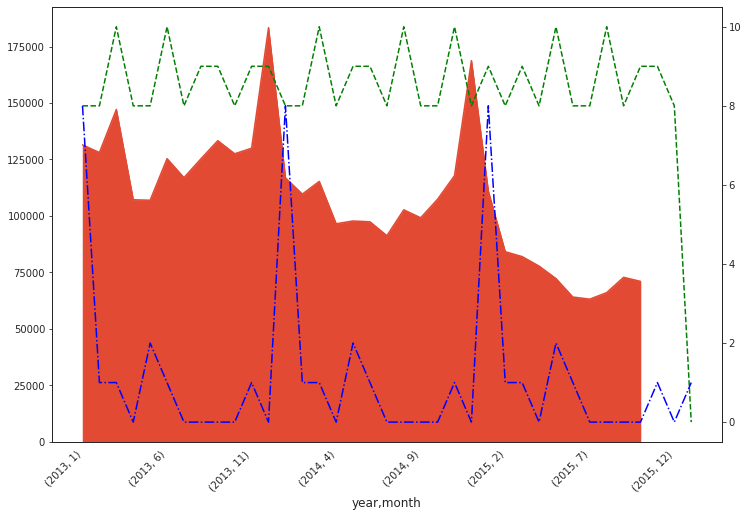

In [34]:
chart = data1.groupby(by=['year', 'month'])['item_cnt_month'].sum().plot(kind='area')
cal_df.groupby(by=['year', 'month'])['weekends'].max().plot(kind='line', secondary_y=True, c='green', ls='--')
cal_df.groupby(by=['year', 'month'])['holidays'].max().plot(kind='line', secondary_y=True, c='blue', ls='-.')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

### Декомпозиция

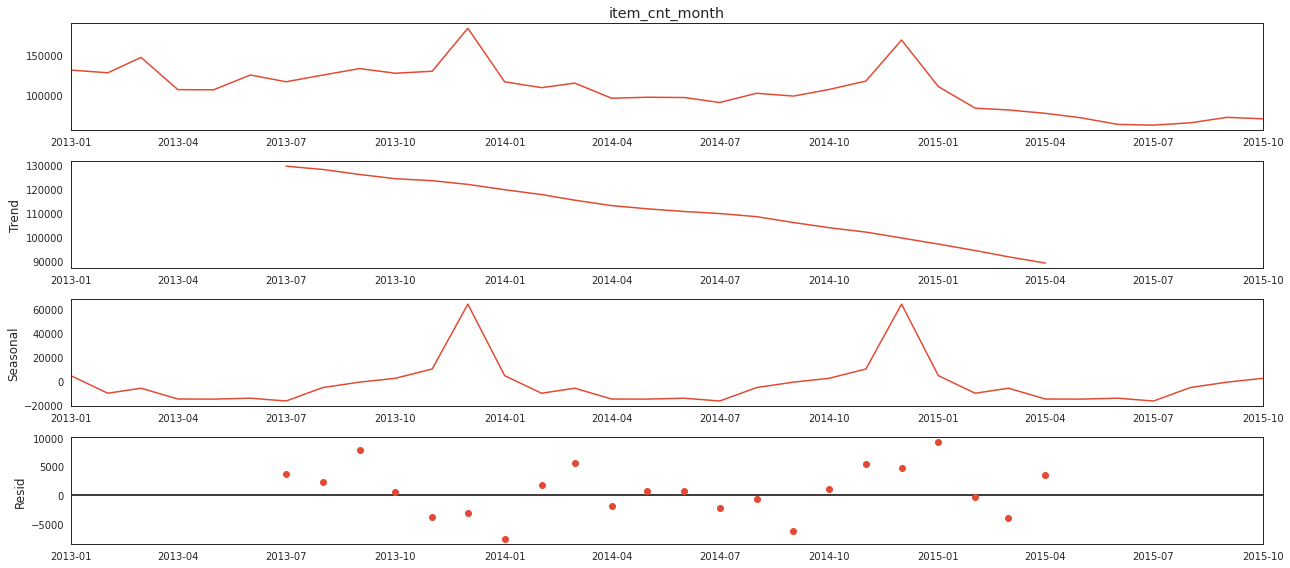

In [35]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data1.set_index('date').resample('MS').sum()['item_cnt_month'], model='additive')
fig = decomposition.plot()
plt.show()

### Продажи в разных городах по месяцам
Вычитаем из x значение x.min() по группе, чтобы графики были читабельнее

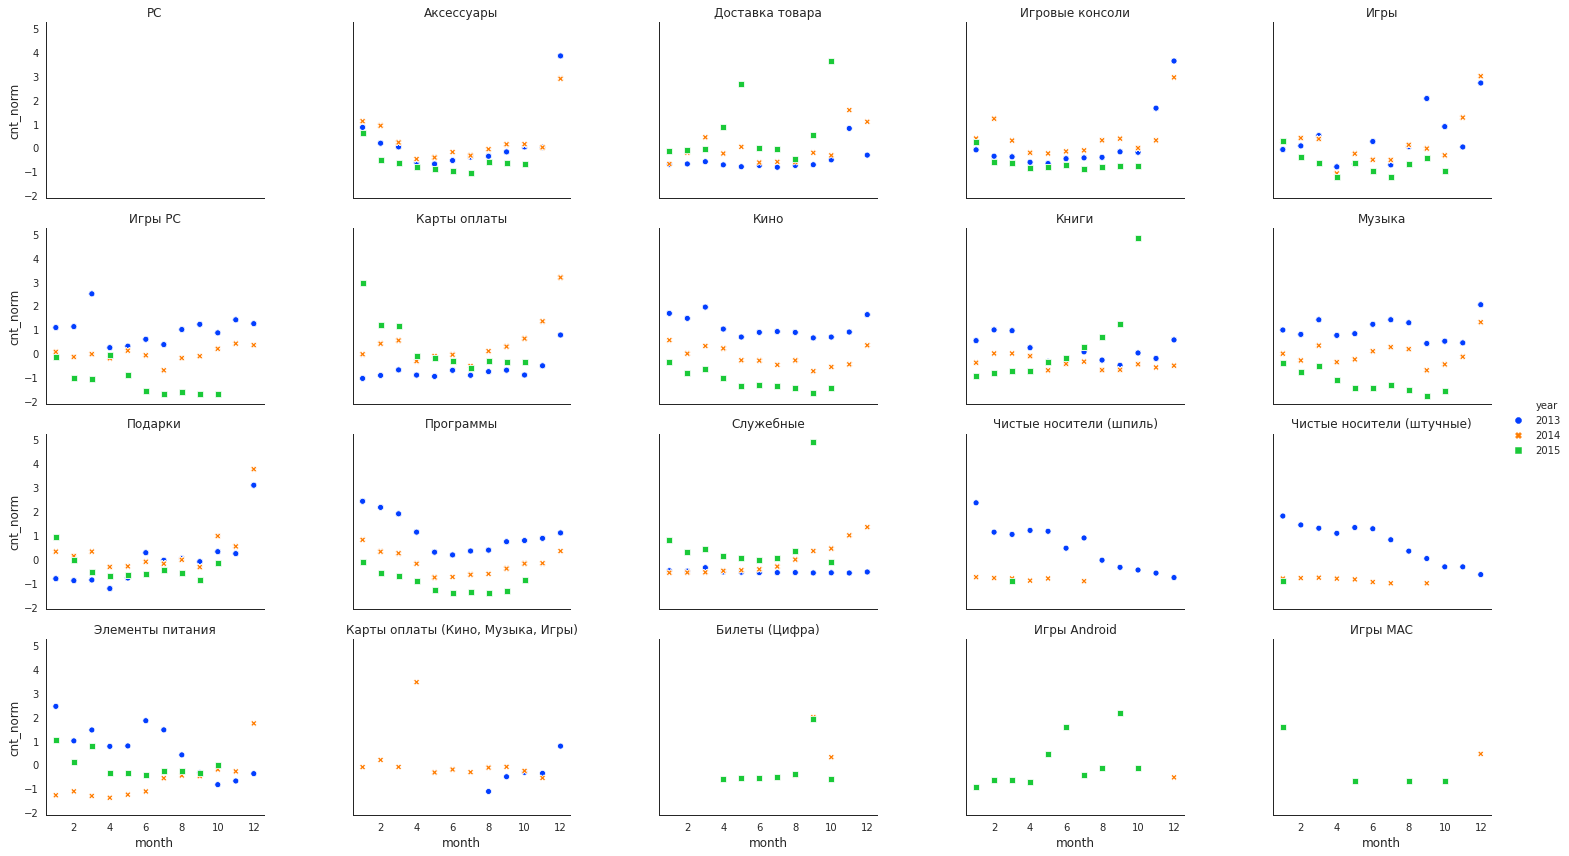

In [36]:
data_plot = data1.groupby(by=['year', 'month', 'item_top_category_id'])['item_cnt_month'].sum().reset_index().\
                    join(item_categories.set_index('item_top_category_id'), on='item_top_category_id').reset_index()
data_plot['cnt_norm'] = data_plot.groupby(['item_top_category_id'])['item_cnt_month'].transform(lambda x: (x - x.mean()) / x.std())

g = sns.relplot(x='month', y='cnt_norm', data=data_plot, col='item_top_category_name', hue='year', style='year',\
                col_wrap=5, height=3, aspect=1.4, palette='bright');

g.set_titles('{col_name}')

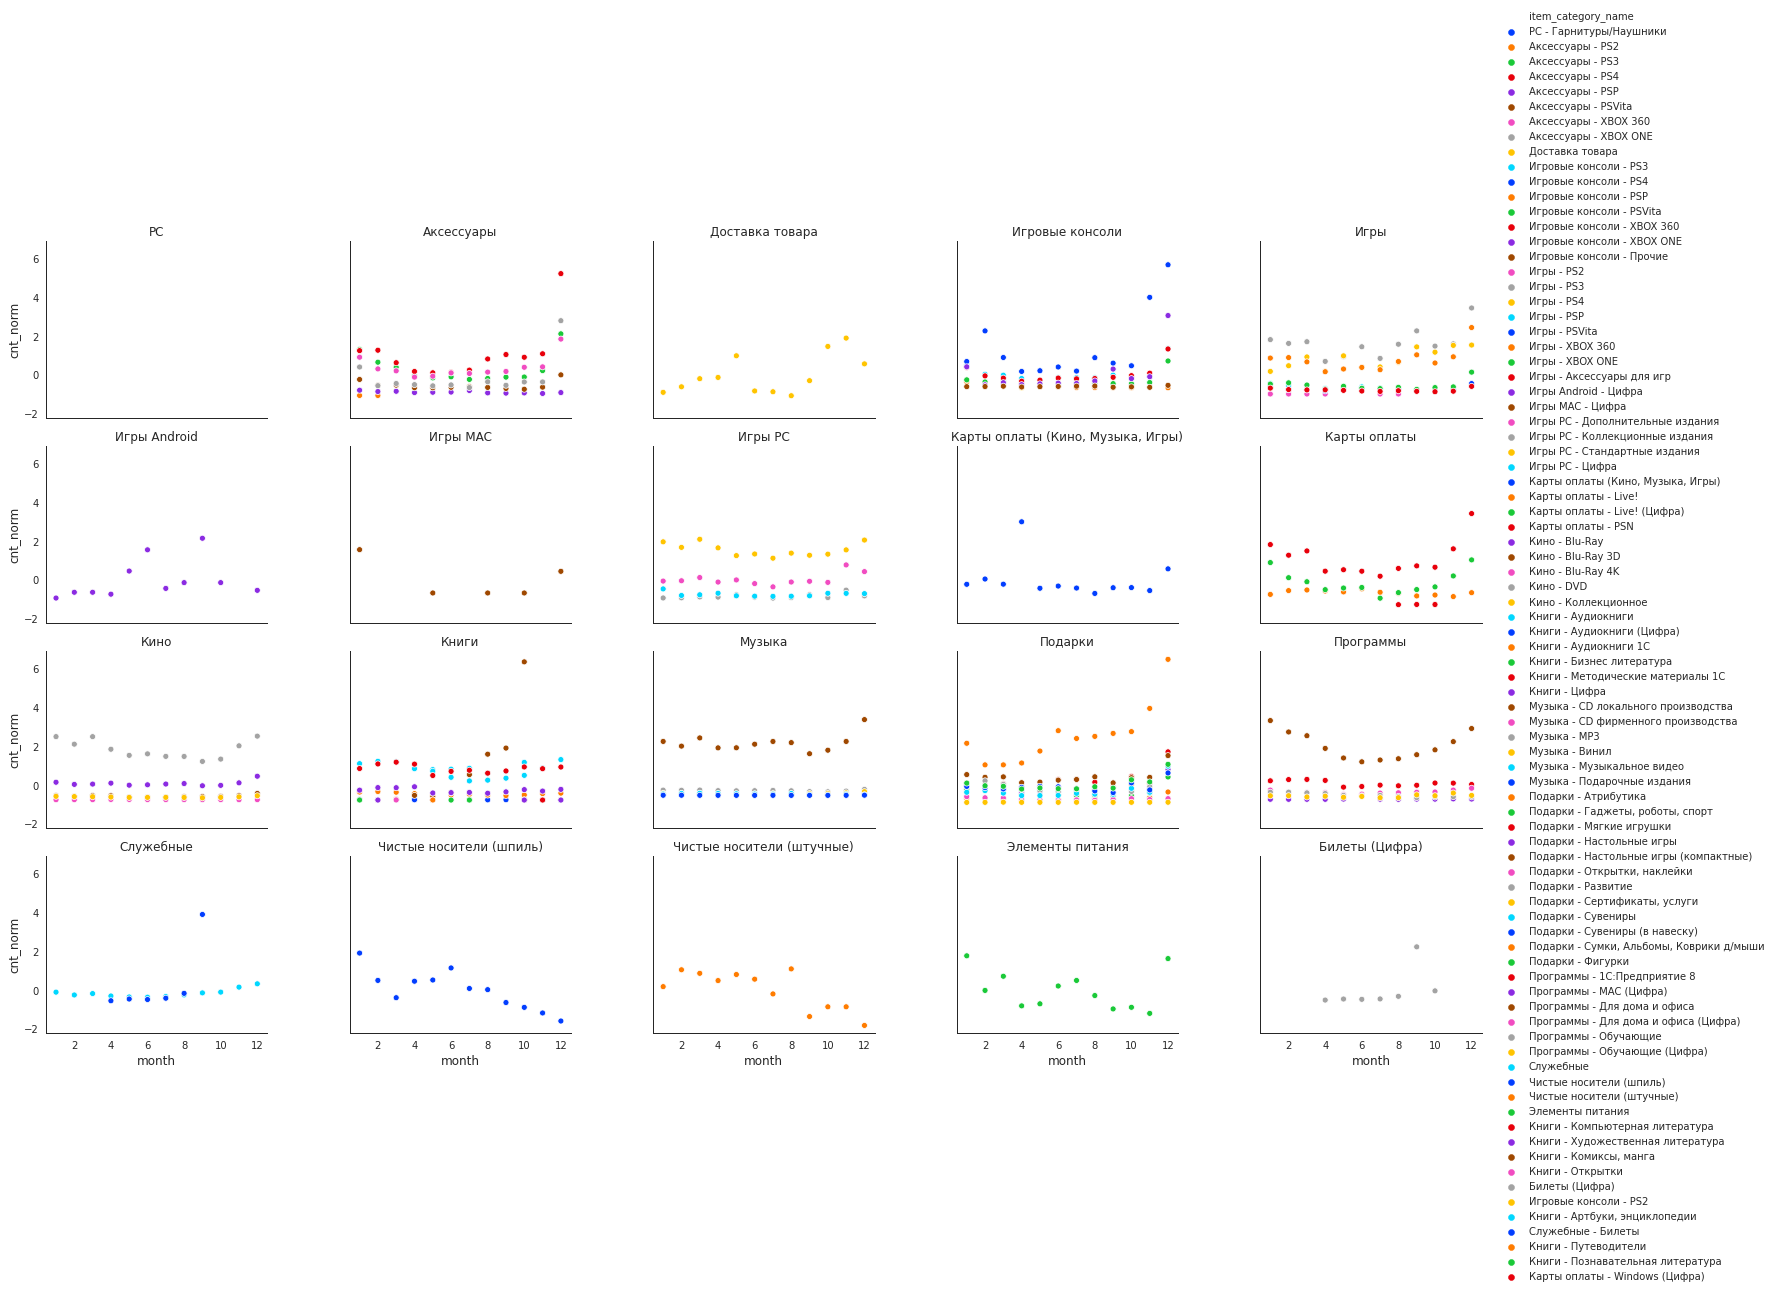

In [37]:
data_plot = data1.drop('item_top_category_id', axis=1).groupby(by=['year','month', 'item_category_id'])['item_cnt_month'].sum().reset_index().\
                groupby(by=['month', 'item_category_id']).mean().join(item_categories.set_index('item_category_id'), on='item_category_id').reset_index()
data_plot['cnt_norm'] = data_plot.groupby(['item_top_category_id'])['item_cnt_month'].transform(lambda x: (x - x.mean()) / x.std())

g = sns.relplot(x='month', y='cnt_norm', data=data_plot, col='item_top_category_name', hue='item_category_name', \
                col_wrap=5, height=3, aspect=1.4, palette='bright');

g.set_titles('{col_name}')

In [38]:
#= data1.groupby(['year', 'month', 'item_top_category_id'])['item_cnt_month'].transform(lambda x: (x - x.mean()) / x.std())


In [39]:
data1_y = ['item_cnt_month']
data1_x = data1.columns
data1_x_cat = ['item_id', 'shop_id', 'year', 'month', 'city_id', 'item_category_id', 'item_top_category_id']

In [40]:
enc = OneHotEncoder(handle_unknown='ignore')

data1_enc = enc.fit_transform(data1[data1_x_cat])

data1_enc

<1609124x22018 sparse matrix of type '<class 'numpy.float64'>'
	with 11263868 stored elements in Compressed Sparse Row format>

In [41]:
data1_x_num = ['year', 'days', 'holidays']
data1_x_cat = ['city_id', 'item_category_id', 'item_top_category_id', 'month', 'shop_id', 'item_id']
data1_y = 'item_cnt_month'

data1_train = data1[data1['date'] < datetime.datetime(2015,1,1)]

data1_test = data1[(data1['date'] >= datetime.datetime(2015,1,1)) & (data1['date'] < datetime.datetime(2015,2,1))]
display(data1_train.shape, data1_test.shape)

(1255269, 12)

(46775, 12)

In [42]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(data1_train[data1_x_num + data1_x_cat], data1_train[data1_y], 
    eval_metric="rmse", 
        verbose=True)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=None)

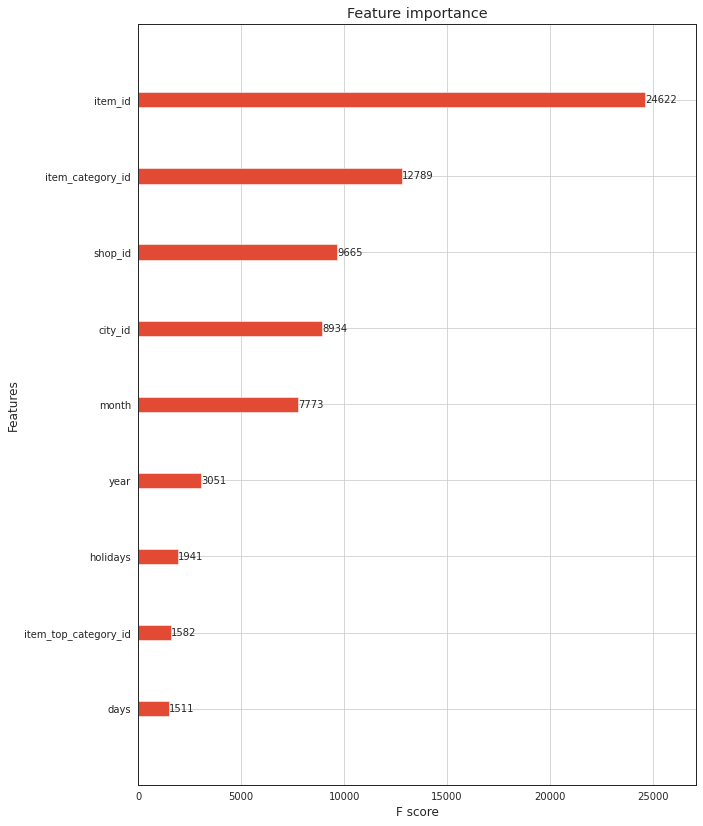

In [45]:
from xgboost import plot_importance

data1_predict = model.predict(data1_test[data1_x_num + data1_x_cat]).clip(0, 20)

submission = pd.DataFrame({
    "ID": data1_test.index, 
    "item_cnt_month": data1_predict
})
#submission.to_csv('xgb_submission.csv', index=False)

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)
plot_features(model, (10,14))

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(data1_test[data1_y], data1_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(data1_test[data1_y], data1_predict))

Mean squared error: 118.70
Coefficient of determination: 0.04


(46775,)

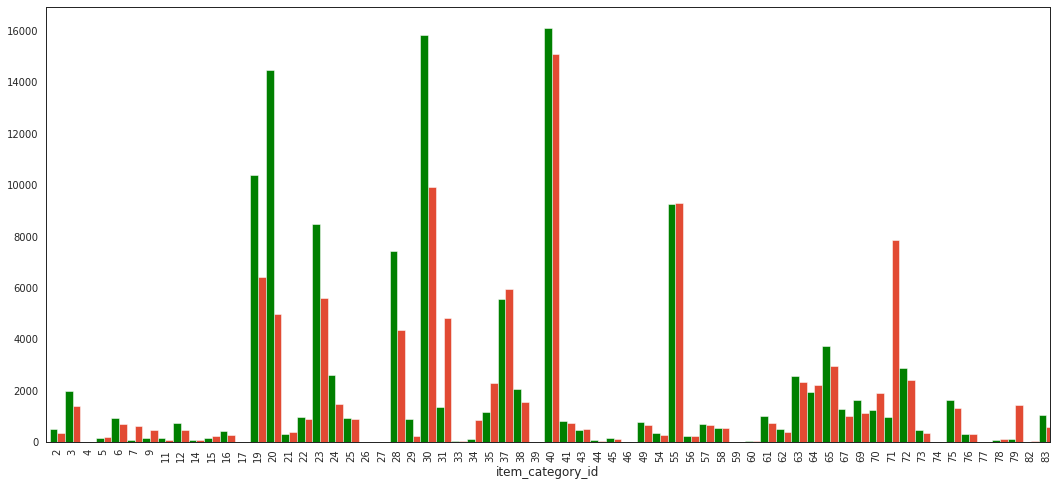

In [46]:
data1_test['item_cnt_month2'] = data1_predict
display(data1_test.groupby(['item_category_id'])['item_cnt_month'].sum().sort_index().plot(kind='bar', position=0))
display(data1_test.groupby(['item_category_id'])['item_cnt_month2'].sum().sort_index().plot(kind='bar', colormap='ocean', position=1))